## **Задача 1. Разведочный анализ**
### Васаулюа Тази Брюнотт, Гр-М81

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer
import seaborn as sns

1. Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.

 -> [Real Estate Saint Petersburg 2014 - 2019 (Недвижимость Санкт-Петербурга 2014 - 2019)](https://www.kaggle.com/datasets/litvinenko630/real-estate-saint-petersburg-2014-2019) из Kaggle

2. Считать данные и вывести их основные характеристики, описание признаков. 
#### Описание
Этот набор данных содержит информацию о предложениях недвижимости, включая различные характеристики объектов недвижимости и прилегающих к ним территорий. 
- airports_nearest: Расстояние до ближайшего аэропорта в метрах
- balcony: Количество балконов
- ceiling_height: Высота потолков в метрах
- Citycenters_narest: Расстояние до центра города в метрах
- days_exposition: Количество дней, в течение которых объявление было активным (с момента публикации до удаления)
- first_day_exposition: Дата публикации
- floor: Количество этажей объекта
- floors_total: Общее количество этажей, на которых находится объект. этажи в здании
- is_apartment: Логическое значение, указывающее, является ли объект недвижимости квартирой
- kitchen_area: Площадь кухни в квадратных метрах
- last_price: Цена на момент удаления объявления
- living_area: Жилая площадь в квадратных метрах
- locality_name: Название населенного пункта 
- open_plan: Логическое значение, указывающее, имеет ли недвижимость открытую планировку
- parks_around3000: Количество парков в радиусе 3 км
- parks_nearest: Расстояние до ближайшего парка в метрах
- ponds_around3000: Количество прудов/водоемов в радиусе 3 км
- ponds_nearest: Расстояние до ближайшего парка в метрах расстояние до ближайшего пруда/водоема в метрах
- rooms: Количество комнат
- studio: Логическое значение, указывающее, является ли объект однокомнатной квартирой
- total_area: Общая площадь объекта в квадратных метрах
- total_images: Количество фотографий в списке

In [2]:
all_data = pd.read_csv("spb\spb_real_estate_data.csv", sep='\t', encoding='utf-8')
all_data

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Брюнотт\AppData\Local\Temp\ipykernel_1232\3196156815.py:1: SyntaxWarning: invalid escape sequence '\s'
  all_data = pd.read_csv("spb\spb_real_estate_data.csv", sep='\t', encoding='utf-8')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
print("Основные характеристики")
print("-----------------------")
print("\n\t** Все пропущенные значения по столбцам:\n\n",all_data.isnull().sum())
print("\n\t** Shape(количество строк и столбцов):", all_data.shape)
print("\n\t** Data types:\n\n", all_data.dtypes)


Основные характеристики
-----------------------

	** Все пропущенные значения по столбцам:

 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

	** Shape(количество строк и столбцов): (23699, 22)

	** Data types:

 total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ce

### Сводная статистика:
- count : количество наблюдений, отличных от NA/null.
- unique : уникальные значения
- max : Максимальное из значений в объекте.
- min : Минимальное из значений в объекте.
- mean : Среднее из значений.
- std : Стандартное отклонение результатов наблюдений.
- 25%, 50%, 75% : нижний, 50-й и верхний процентили. По умолчанию нижний процентиль равен 25, а верхний - 75. 
- top : это наиболее распространенное значение. 
- freq : - это частота наиболее распространенного значения. 

In [4]:
all_data.describe(include='all')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,...,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,...,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,...,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,...,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,...,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,...,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,...,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,...,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


3. Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным. 

    -> Выбрала предсказывать цену объекта с учетом количества комнат, расстояния до центра города, количества этажей, жилой площади, расстояния до ближайшего парка и общей площади.
    #### признак "last_price"

4. Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.


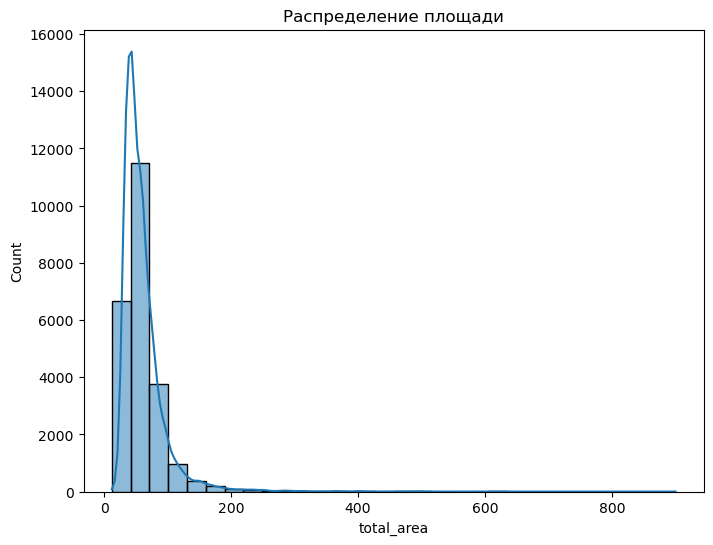

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data=all_data, x='total_area', bins=30, kde=True)
plt.title('Распределение площади')
plt.show()

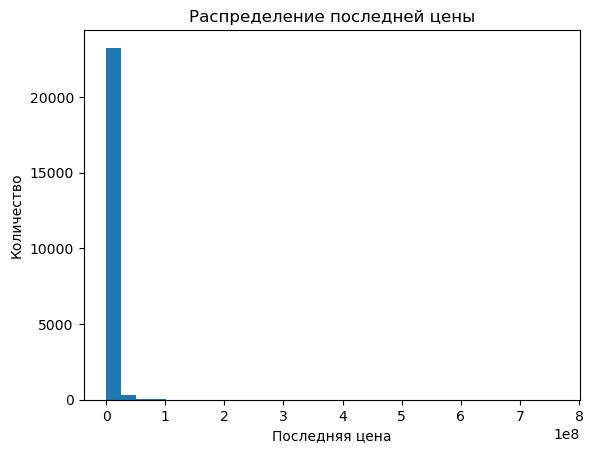

In [6]:
plt.hist(all_data['last_price'], bins=30)
plt.title('Распределение последней цены')
plt.xlabel('Последняя цена')
plt.ylabel('Количество')
plt.show()

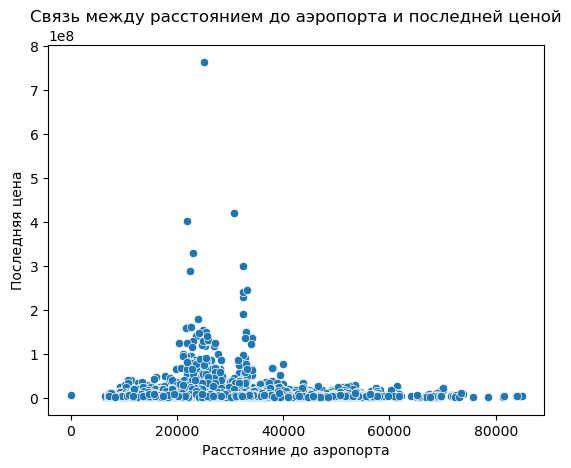

In [7]:
sns.scatterplot(x='airports_nearest', y='last_price', data=all_data)
plt.title('Связь между расстоянием до аэропорта и последней ценой')
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Последняя цена')
plt.show()

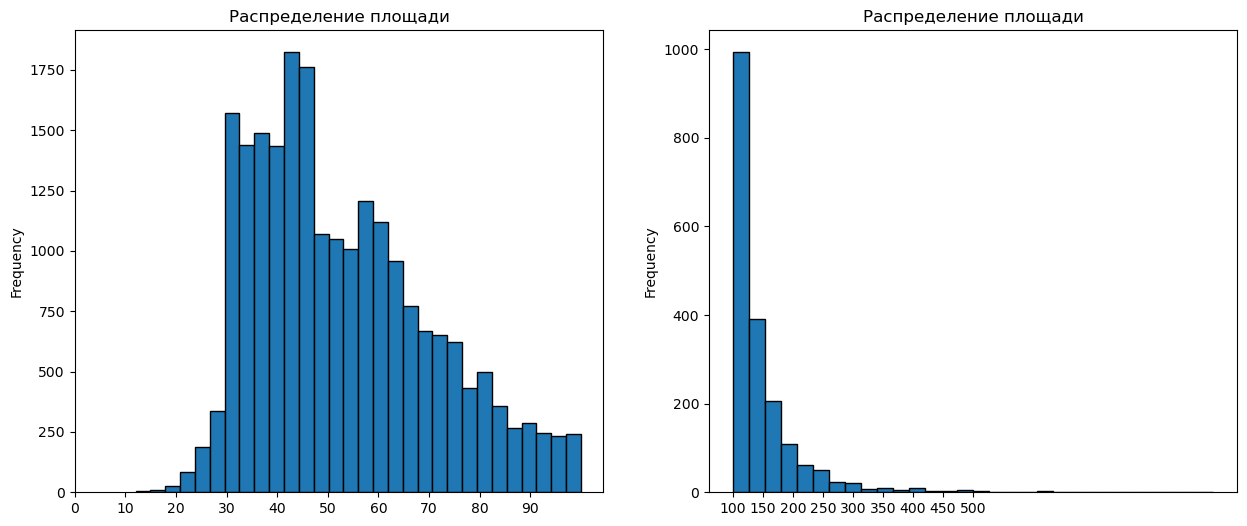

In [8]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
all_data[all_data['total_area'] <= 100]['total_area'].plot.hist(ax=ax[0], edgecolor='black', bins=30)
ax[0].set_title('Распределение площади')
x1 = list(range(0, 100, 10))
ax[0].set_xticks(x1)
all_data[all_data['total_area'] >= 100]['total_area'].plot.hist(ax=ax[1], edgecolor='black', bins=30)
ax[1].set_title('Распределение площади')
x1 = list(range(100, 550, 50))
ax[1].set_xticks(x1)

Text(0.5, 1.0, 'Распределение аномальных цен ')

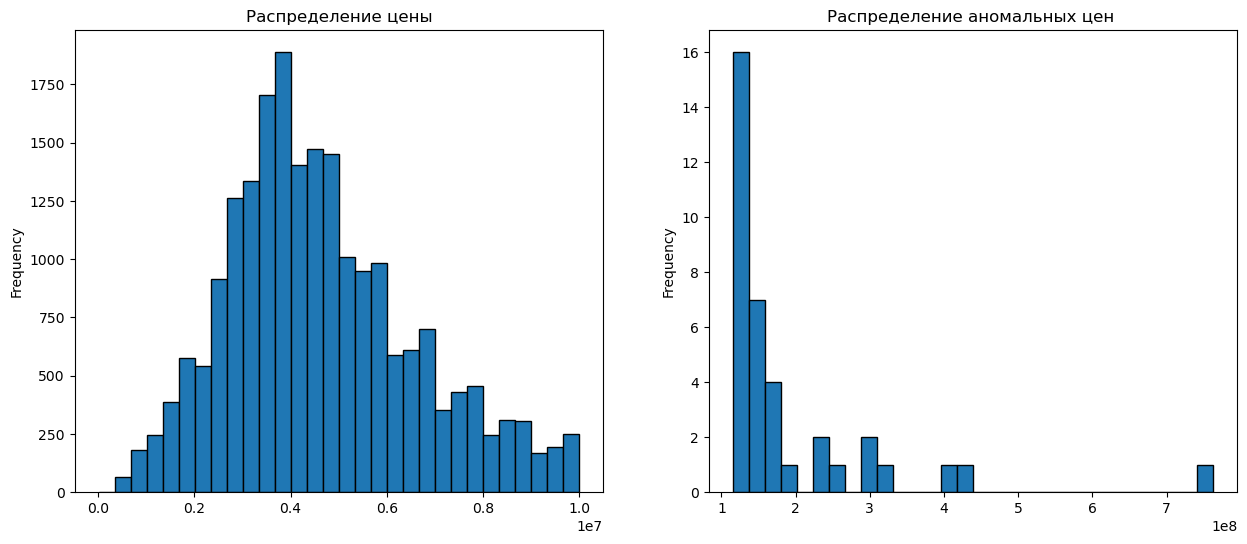

In [9]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
all_data[all_data['last_price'] <= 5+1e7]['last_price'].plot.hist(ax=ax[0], edgecolor='black', bins=30)
ax[0].set_title('Распределение цены')

all_data[all_data['last_price'] >= 1+1e8]['last_price'].plot.hist(ax=ax[1],  edgecolor='black', bins=30)
ax[1].set_title('Распределение аномальных цен ')

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
all_data[all_data['floor'] <= 3]['floor'].plot.hist(ax=ax[0], bins=30, x='floor', y='last_price')
ax[0].set_title('Средняя цена по кол- этаж.')

all_data[all_data['floor'] <= 3]['floor'].plot.hist(ax=ax[1], bins=30, x='floor', y='last_price')
ax[1].set_title('Средняя цена по кол- этаж ')

Text(0.5, 1.0, 'Средняя цена по кол- этаж ')

5. Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.


In [12]:
all_data.info()
print("\n\t** Все пропущенные значения по столбцам:\n\n",all_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [13]:
# Prepare the data
all_data['is_apartment'] = all_data['is_apartment'].astype(bool)

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=7)

# Fit the imputer
imputer.fit(all_data[['last_price', 'total_area', 'rooms', 'studio', 'open_plan','floors_total']])

# Transform the data
imputed_values = imputer.transform(all_data[['last_price', 'total_area', 'rooms', 'studio', 'open_plan','floors_total']])

# Convert the imputed values to a Boolean array
imputed_values = (imputed_values[:, -1] > 0.5).astype(bool)

# Convert the imputed values to a pandas Series
imputed_values = pd.Series(imputed_values)

# Replace the missing values in the is_apartment column with the imputed values
all_data['is_apartment'] = all_data['is_apartment'].fillna(imputed_values)
print("\n\t** Все пропущенные значения по столбцам:\n\n",all_data.isnull().sum())
all_data



	** Все пропущенные значения по столбцам:

 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,True,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,True,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,True,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,True,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [14]:
all_data[['locality_name']] = all_data[['locality_name']].fillna("Неизвестно")
all_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,True,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,True,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,True,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,True,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [15]:
all_data[['days_exposition', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest']] = all_data[['days_exposition', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest']].fillna(all_data[['days_exposition', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest']].mean())
print("\n\t** Все пропущенные значения по столбцам:\n\n",all_data.isnull().sum())


	** Все пропущенные значения по столбцам:

 total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


 6. (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the locality_name column
le.fit(all_data['locality_name'])

# Transform the locality_name column to numerical values
all_data['locality_name'] = le.transform(all_data['locality_name'])

# Print out the legend
print("Legend:")
for i, label in enumerate(le.classes_):
    print(f"{i}: {label}")

Legend:
0: Бокситогорск
1: Волосово
2: Волхов
3: Всеволожск
4: Выборг
5: Высоцк
6: Гатчина
7: Зеленогорск
8: Ивангород
9: Каменногорск
10: Кингисепп
11: Кириши
12: Кировск
13: Колпино
14: Коммунар
15: Красное Село
16: Кронштадт
17: Кудрово
18: Лодейное Поле
19: Ломоносов
20: Луга
21: Любань
22: Мурино
23: Неизвестно
24: Никольское
25: Новая Ладога
26: Отрадное
27: Павловск
28: Петергоф
29: Пикалёво
30: Подпорожье
31: Приморск
32: Приозерск
33: Пушкин
34: Санкт-Петербург
35: Светогорск
36: Сертолово
37: Сестрорецк
38: Сланцы
39: Сосновый Бор
40: Сясьстрой
41: Тихвин
42: Тосно
43: Шлиссельбург
44: городской поселок Большая Ижора
45: городской поселок Янино-1
46: городской посёлок Будогощь
47: городской посёлок Виллози
48: городской посёлок Лесогорский
49: городской посёлок Мга
50: городской посёлок Назия
51: городской посёлок Новоселье
52: городской посёлок Павлово
53: городской посёлок Рощино
54: городской посёлок Свирьстрой
55: городской посёлок Советский
56: городской посёлок Фёдоровс

7. (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).

  -> В моем наборе данных у меня есть эти таблицы: 'first_day_exposition', 'days_exposition' . Для будущих манипуляций (например, в задаче прогнозирования) они будут мне не так полезны. Было бы здорово, если бы они указывали, например, год постройки здания, это было бы отличной особенностью.

  -> Я могу создать новую таблицу : цена за площадь(price_per_area), которая является хорошей функцией при работе с данными о недвижимости

In [17]:
# Creating a new feature: price_per_area
all_data['price_per_area'] = all_data['last_price'] / all_data['total_area']
all_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,True,...,1.150082,34,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.0000,180.888634,120370.370370
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.771499,11.0,18.600000,1,True,...,2.000000,327,12817.000000,18603.000000,0.000000,490.804555,0.000000,517.9809,81.000000,82920.792079
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.771499,5.0,34.300000,4,True,...,0.000000,34,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.0000,558.000000,92785.714286
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.771499,14.0,34.457852,9,True,...,0.000000,34,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.0000,424.000000,408176.100629
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,True,...,1.150082,34,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.0000,121.000000,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.300000,3,True,...,1.150082,34,24665.000000,4232.000000,1.000000,796.000000,3.000000,381.0000,180.888634,72490.845228
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.771499,5.0,38.000000,4,True,...,1.150082,42,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.9809,45.000000,52542.372881
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.771499,3.0,29.700000,1,True,...,1.150082,361,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.9809,180.888634,44091.710758
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000000,17.0,34.457852,12,True,...,2.000000,34,39140.000000,10364.000000,2.000000,173.000000,3.000000,196.0000,602.000000,149511.400651


In [18]:
data_drop_colums = all_data.drop(columns=['first_day_exposition', 'days_exposition', 'total_images'])
data_drop_colums

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_per_area
0,13000000.0,108.00,3,2.700000,16.0,51.000000,8,True,False,False,25.000000,1.150082,34,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.0000,120370.370370
1,3350000.0,40.40,1,2.771499,11.0,18.600000,1,True,False,False,11.000000,2.000000,327,12817.000000,18603.000000,0.000000,490.804555,0.000000,517.9809,82920.792079
2,5196000.0,56.00,2,2.771499,5.0,34.300000,4,True,False,False,8.300000,0.000000,34,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.0000,92785.714286
3,64900000.0,159.00,3,2.771499,14.0,34.457852,9,True,False,False,10.569807,0.000000,34,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.0000,408176.100629
4,10000000.0,100.00,2,3.030000,14.0,32.000000,13,True,False,False,41.000000,1.150082,34,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.0000,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.700000,5.0,73.300000,3,True,False,False,13.830000,1.150082,34,24665.000000,4232.000000,1.000000,796.000000,3.000000,381.0000,72490.845228
23695,3100000.0,59.00,3,2.771499,5.0,38.000000,4,True,False,False,8.500000,1.150082,42,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.9809,52542.372881
23696,2500000.0,56.70,2,2.771499,3.0,29.700000,1,True,False,False,10.569807,1.150082,361,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.9809,44091.710758
23697,11475000.0,76.75,2,3.000000,17.0,34.457852,12,True,False,False,23.300000,2.000000,34,39140.000000,10364.000000,2.000000,173.000000,3.000000,196.0000,149511.400651


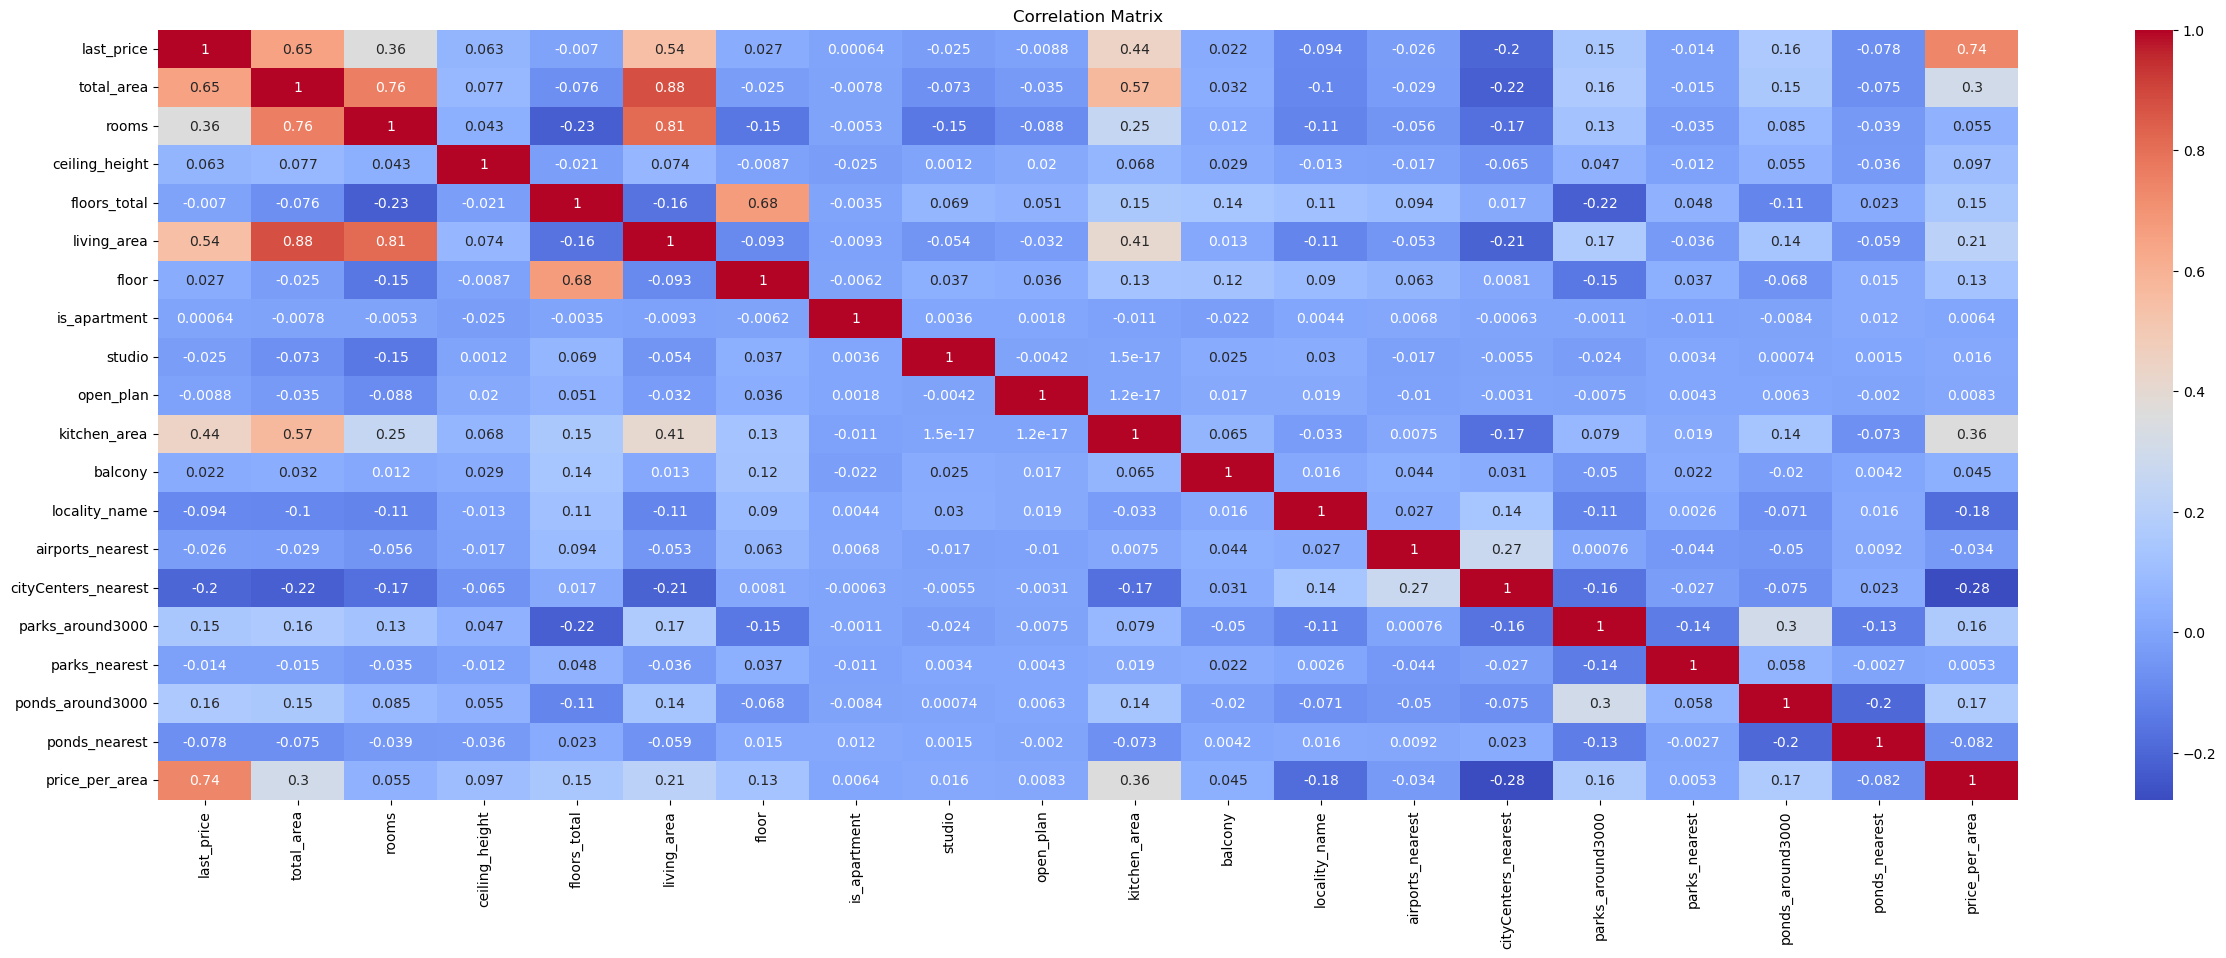

In [19]:
# Calculate the correlation matrix
corr_matrix = data_drop_colums.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Вывод